In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train.shape, x_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000, 28, 28), (10000, 28, 28), (10000,))

In [ ]:
x_train = x_train.astype("float32").reshape(-1, 28, 28, 1) / 255.
x_test = x_test.astype("float32").reshape(-1, 28, 28, 1) / 255.

x_train.shape, x_test.shape


((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

x_train.shape, x_val.shape


((48000, 28, 28, 1), (12000, 28, 28, 1))

In [ ]:
import numpy as np
from tensorflow.keras.utils import to_categorical
num_classes = 10

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
y_val=to_categorical(y_val, num_classes)
y_train.shape, y_test.shape

((48000, 10), (10000, 10))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Dropout(0.2),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='sigmoid')
])

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               692352    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                      

In [ ]:
# import tensorflow as tf
# tf.keras.utils.plot_model(model)

In [ ]:
history = model.fit(x_train,
                    y_train,
                    validation_data=(x_val,y_val),
                    epochs=15,
                    # steps_per_epoch=len(X_train)//32,
                    # validation_steps=len(X_val)//32,
                    )

Epoch 1/15
1500/1500 [==============================] - 7s 4ms/step - loss: 0.4111 - accuracy: 0.8554 - val_loss: 0.2990 - val_accuracy: 0.8906
Epoch 2/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2851 - accuracy: 0.8963 - val_loss: 0.2997 - val_accuracy: 0.8941
Epoch 3/15
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2435 - accuracy: 0.9103 - val_loss: 0.2672 - val_accuracy: 0.9019
Epoch 4/15
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2141 - accuracy: 0.9202 - val_loss: 0.2469 - val_accuracy: 0.9105
Epoch 5/15
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1900 - accuracy: 0.9297 - val_loss: 0.2536 - val_accuracy: 0.9058
Epoch 6/15
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1706 - accuracy: 0.9372 - val_loss: 0.2391 - val_accuracy: 0.9146
Epoch 7/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1528 - accuracy: 0.9433 - val_loss: 0.2337 - val_accuracy:

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3276 - accuracy: 0.9164


In [ ]:
test_accuracy,test_loss

(0.9164000153541565, 0.3275579512119293)

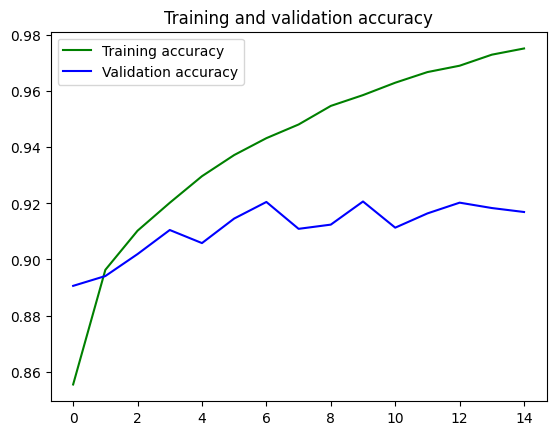

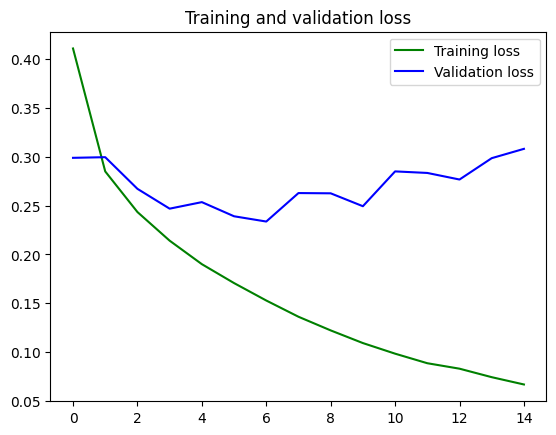

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'g', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
### REPORTS ######

In [ ]:
# get the predictions for the test data
predicted_classes = model.predict(x_test)
predicted_classes = np.argmax(predicted_classes, axis=1)

# get the indices to be plotted
y_true =np.argmax(y_test, axis=1)


313/313 [==============================] - 1s 2ms/step


In [ ]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(10)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.84      0.88      0.86      1000
     Class 1       1.00      0.97      0.99      1000
     Class 2       0.89      0.85      0.87      1000
     Class 3       0.89      0.95      0.92      1000
     Class 4       0.86      0.89      0.87      1000
     Class 5       0.97      0.99      0.98      1000
     Class 6       0.79      0.73      0.76      1000
     Class 7       0.97      0.97      0.97      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.97      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [ ]:
y_true[8]

5

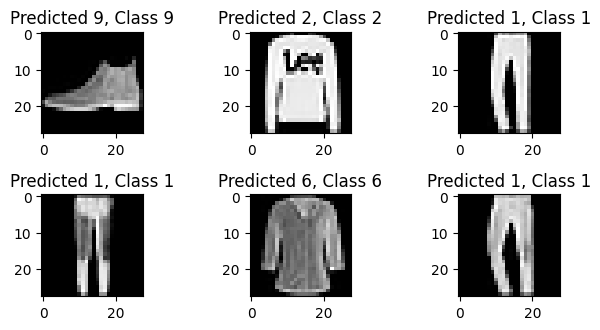

In [ ]:
for i in range(6):
    plt.subplot(3,3,1+i)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[i], y_true[i]))
    plt.tight_layout()